# Visualizacion de soluciones

<p style="color:red"><strong>Este notebook está pensado para ejecutarse, porque incluye celdas animadas que para visualizarlas se deben de ejecutar.</strong></p>

In [1]:
from jigsaw import *

Cargamos las piezas aplicando el fix, que hace que el algoritmo interprete piezas como aristas que en realidad no lo son.

In [2]:
lista_piezas = [Piece(i)for i in range(25)]
for i in range(5):
    lista_piezas[i].edges[0].kind = "plano"
    lista_piezas[i+20].edges[2].kind = "plano"
    if i == 0:
        for j in range(5):
            lista_piezas[i+5*j].edges[1].kind = "plano"
    if i == 4:
        for j in range(5):
            lista_piezas[i+5*j].edges[3].kind = "plano"

Cargamos las piezas en el solucionador

In [3]:
solver = Backtrack_solver(lista_piezas)

### Funcionamiento.

El solucionador que hemos implementado es un algoritmo de backtracking con la opcion de funcionar de forma voraz (greedy). Se basa en los siguiente.

- Primero hace todo el borde del puzle.
- Continua en forma de espiral de esa manera nos aseguramos que cada pieza tiene al menos 2 piezas adyacentes ya colocadas, lo cual castiga mas los errores, y reduce mucho el espacio de busqueda, (no todas las piezas pueden si quieren encajar en una posicion que ya tiene 2 adyacentes).

### Parametros.


- `c1`: La importancia que le damos a que las longitudes de las aristas sean similares, esto sirve a modo de criba si dos piezas no tienen aristas con longitudes similares no van a coincidir bien, pero si te pasas ajustandolo puedes descartar piezas que en realidad si encajan bien pero que no miden los mismo por ruido o impercisiones del puzle.

<center>
<img src="fotos\ejemplos\criba.jpg" alt="param_c1" width="600" />
</center>

*Idea y grafico sacado del video de youtube https://www.youtube.com/watch?v=WsPHBD5NsS0*

- `n_samples`: Como cada contorno es una secuecnia de puntos irrecgular la hacemos continua mendiante interpolacion con splines cubicos naturales, y seleccionamos el mismo numero de samples distribuidos uniformemente a lo largo del contorno para comparar las piezas. Este parametro indica cuantos samples tomamos de cada contorno para hacer la comparacion.
<center>
<img src="fotos\ejemplos\n_samples.jpg" alt="param_n_samples" width="600" />
</center>

- `greedy`: Activa o desactiva el modo voraz, en el que se selecciona siempre la mejor arista disponible en cada paso. O si se detecta que no hay ninguna arista que encaje bien se retrocede y se prueban otras opciones.

<center>
<img src="fotos\ejemplos\backtrack.jpg" alt="param_greedy" width="600" />
</center>



- `edge_threshold`: Umbral maximo de error permitido para considerar que dos aristas encajan bien en las piezas de borde (Se divide en el interior y el exterior del puzle).


# Visualizacion para reconstriccion del puzle por el usuario.

La primera visualizacion del algorito busca generar las instrucciones para que el usuario pueda reconstruir el puzle manualmente. En cada pieza se muestra su identificador (Segun su orden en la imagen original) y el numero de rotaciones necesarias para colocarla correctamente.

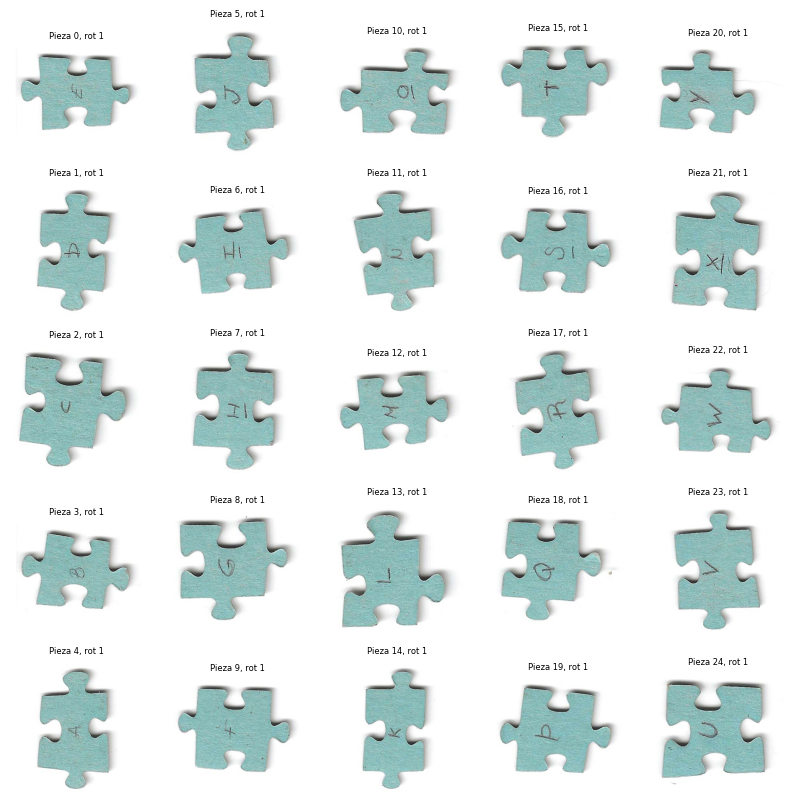

Solucion completada


In [4]:
solver.solve(plot_for_ipynb_t_1=True,
             c1=0.25,
             n_samples=50,
             greedy=True,
             edge_threshold=9,
             interior_threshold=16)
print("Solucion completada")

Nos damos cuenta de que la solucion voraz ya soluciona el puzle correctamente si ajustamos bien el parametro c1 y el numero de samples, igualmente vamos a visualizar la solucion con unos parametros muy malos para comprobar que el algoritmo se recupera de los errores que comete. Pero lo haremos con una visualizacion mas clara y vistosa.

# Reconstruccion de la parte de atras.

A continuacion hacemos un ejemplo con otros paramatros algo mas desfavorables para ver como el algoritmo es capaz de recuperarse de los errores que comete, esta vez reconstruyendo la parte de atras del puzle. De manera que se intenta cuadrar las esquinas de las piezas con las de las piezas adyacentes, para hacer una imagen completa.

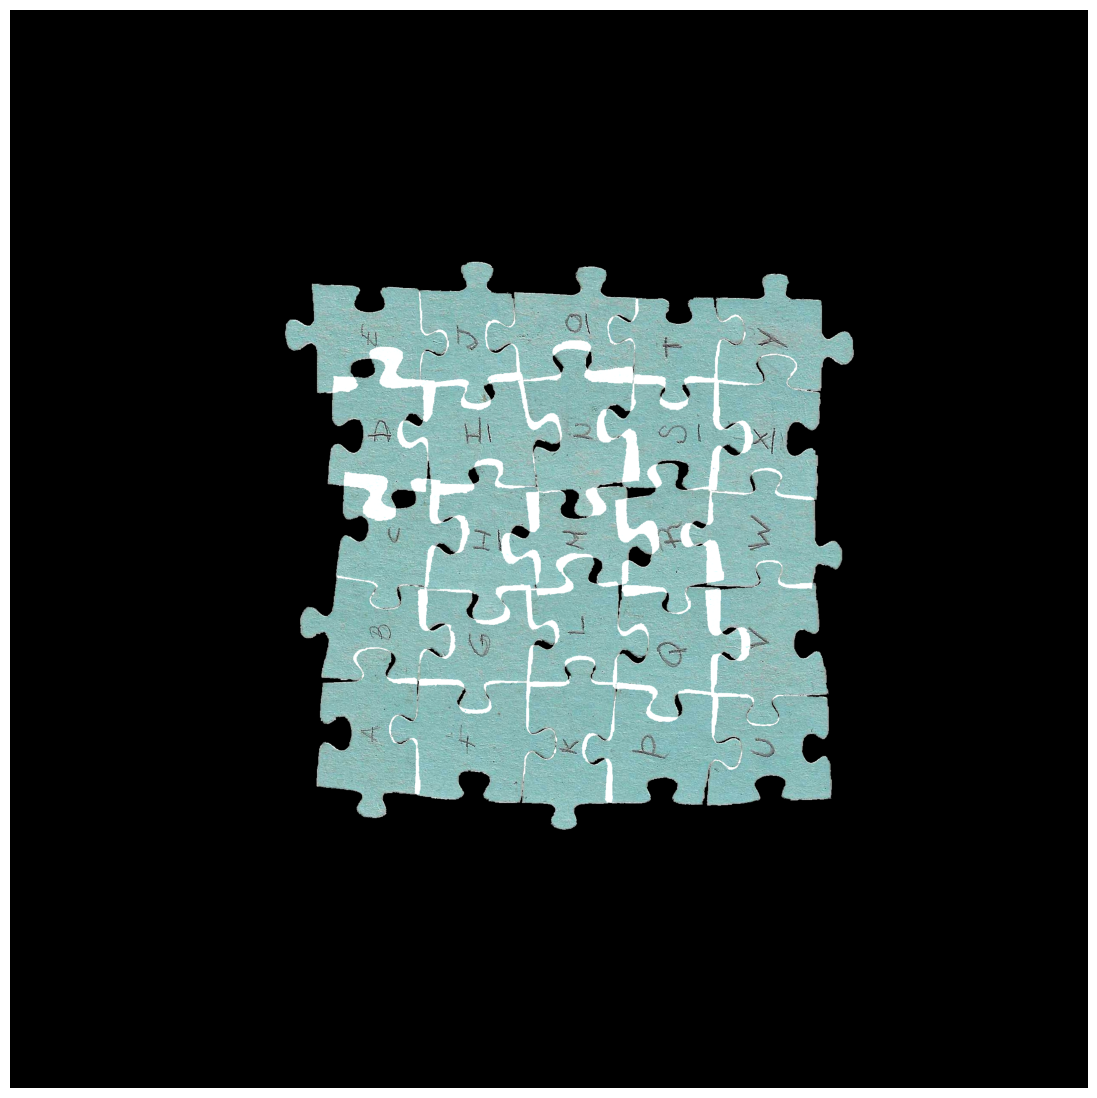

Solucion completada


In [5]:
solver = Backtrack_solver(lista_piezas)
solver.solve(plot_for_ipynb_t_2=True,
             c1=0,
             n_samples=8,
             greedy=False,
             edge_threshold=9,
             interior_threshold=16)
print("Solucion completada")

### Referencia real para comparar.

<center>
<img src="fotos\ejemplos\back.jpeg", width="900" />
</center>

comprobamos que el algoritmo es capaz de reconstriir la imagen correctamente, y cuando comete errores es capaz de recuperarse de ellos.

# Reconstruccion visual del puzle solucionado.

De manera muy similar a la anterior podemos recomponer la parte de alante del puzle y ver como se compone en tiempo real, hemos elegido una parametros todavia mas desfavorables para comprobar la robustez del algoritmo.

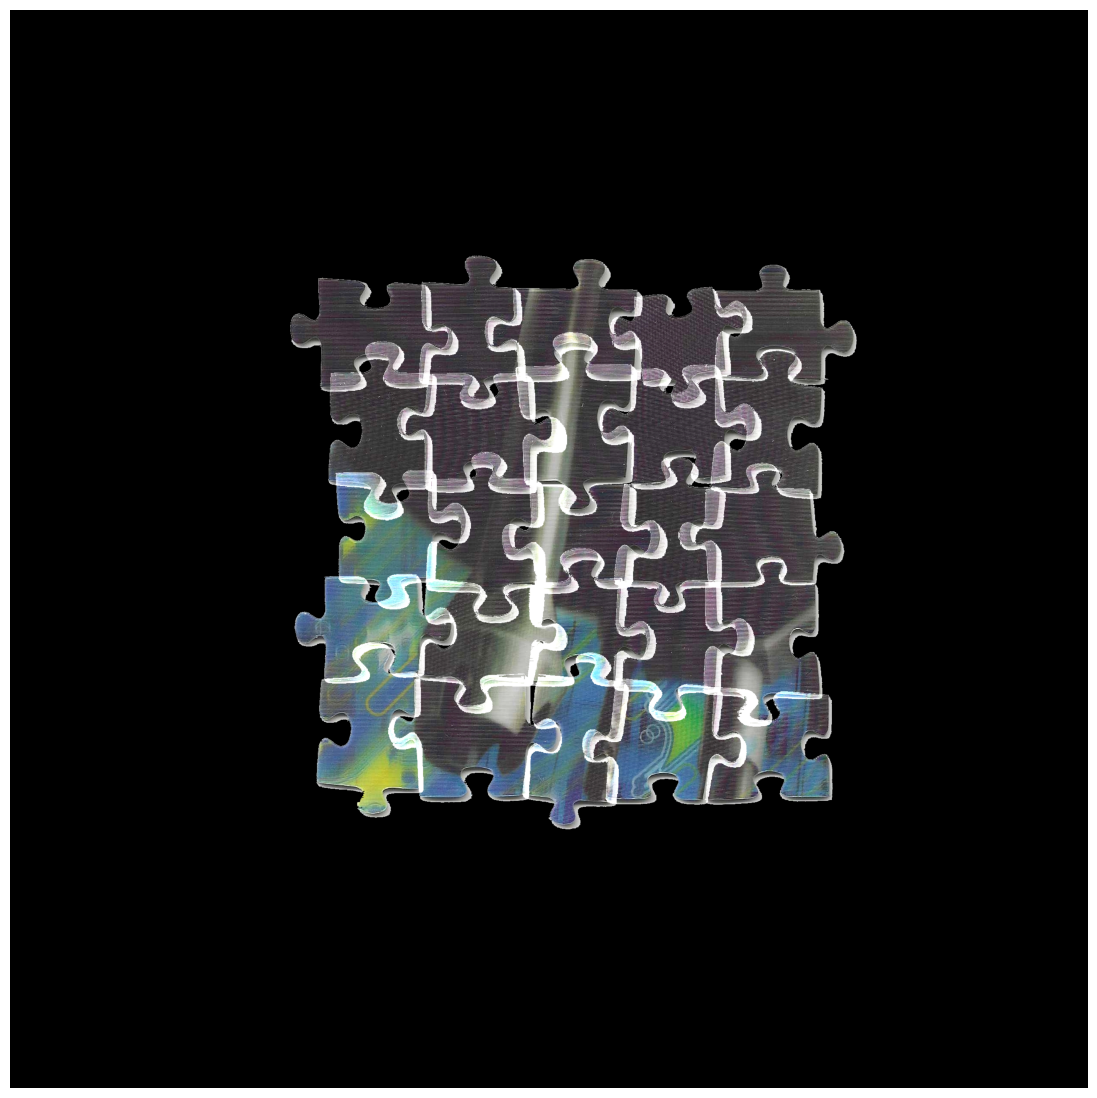

Solucion completada


In [6]:
solver = Backtrack_solver(lista_piezas)
solver.solve(plot_for_ipynb_t_3=True,
             c1=0.06,
             n_samples=4,
             greedy=False,
             edge_threshold=25,
             interior_threshold=16)

print("Solucion completada")

Comprobamos que la imagen reconstruida es igual a la originalk, y que en este caso se comenten mas errorer (cosa que hemos forzado nosotros), aun asi el algoritmo se sigue recuperando de ellos y consigue completar la imagen correctamente.

<center>
<img src="fotos\ejemplos\front.jpeg", width="900" />|
</center>

Aunque todas las técnicas que hemos usado han sido con el único propósito de completar puzzles automáticamente, todo este código se podría usar para fines más útiles, como por ejemplo reconstrucción de documentos o cerámicas que se han roto.

Aquí dejamos un ejemplo de una cerámica con más de 3000 piezas que se reconstruyó de la vía romana cerca de Els Munts, descubierta en 1996.

<p style="text-align: center"><img src="fotos\ejemplos\caseto1.png"></p>

# <center>**FIN** </center>